<a href="https://colab.research.google.com/github/Coyote-Schmoyote/breast-cancer-clf-model/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting breast cancer using a machine learning model

This notebooks looks into using various Python-based machine learning anddata science libraries in an attempt to build a machine learning model capable of predicting whether or not somebody has breast cancer.

## 1. Problem definition
The problem presented in this notebook is based on an exercise from 「東京大学のデータサイエンティスト育成講座」. In the original exercise, the accuracy score of the breast cancer prediciton model was 95.8%. The goal in this notebook is to improve the accuracy.

## 2. Data
The data contains information of breat cancer patients, and is donated in 1995 by the University of Wisconsin. It has 569 samples with 32 attributes. 
This data set is built in scikit-learn, and can be imported using `from sklearn.datasets import load_breast_cancer`.
**More information about data set:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 

## 3. Features
Attribute information:
* ID number
* Diagnosis (M = malignant, B = benign)
* 3-32: Ten real-valued features are computed for each cell nucleus:
 * a) radius (mean of distances from center to points on the perimeter)
 * b) texture (standard deviation of gray-scale values)
 * c) perimeter
 * d) area
  * e) smootness (local variation in radius lengths)
  * f) compactness (perimeter^2 / area - 1.0)
  * g) concavity (severity of concave portions of the contour)
  * h) concave points (number of concave portions of the contour)
  * i) symmetry
  * j) fractal dimension ("coastline approximation" -1)

## 4. Evaluation
The project will be considered successful if we reach accuracy score higher than 95.8% at predicting whether the patient has a malignant or benign tumor.

### Import all the tools




In [15]:
# import regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# import data
from sklearn.datasets import load_breast_cancer





### Scikit-Learn built-in datasets

Scikit-Learn has 7 built-in datasets (also called "toy datasets") that we can use for machine learning projects. The main advantage of the Scikit-Learn datasets is that they are clean and ready to use right away. 
> Using these datasets, we don‘t have to spend time prepraing and transforming the data as much as we would using other datasets.

The dataset we are using for this project includes data on 569 breast cancer scans, with 32 attributes each. 
**More about `load_breast_cancer` dataset** : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer



In [2]:
# save and view the data set 
data = load_breast_cancer()

data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

Hmm... What is this? So, the thing with the Scikit-Learn datasets is that they don‘t return the data in a tabular format, like we are used to. Instead, it returns a `bunch` object.
A `bunch object` is, essentially, a dictionary. Similarly to usual dictionaries, a `bunch`
 object has `keys` (words) and `values` (definitions).

In [3]:
# let‘s see the keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We received 7 keys:
* `data`: array of all the feature data
* `target`: array of the target data (the variable that we want to predict)
> `data` and `target` is the actual data. 
* `frame`: shape of the data
* `target_names`: list of target classes names  
* `DESCR`: string with the full description of the dataset
* `feature_names`: list of dataset column names
* `filename`: string with a path to the data locaiton
> these keys serve a descriptive purpose, and we don‘t really use them when building a model.

In [5]:
# let‘s look at DESCR key‘s value
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

To make the dataset exploration easier, let‘s convert it to `pandas.DataFrame`

In [6]:
# Turn the feature data into a dataframe
df = pd.DataFrame(data.data, 
                  columns = data.feature_names)

# Add the target columns, and fill it with the target data
df["target"] = data.target

# Show the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
# See the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Observations: 
* All data is numerical. It means that we don‘t have to spent time converting categorical datatypes to numerical ones. 
* There are no missing values, so we don‘t have to worry about accounting for the missing data.
>All scikit-learn‘s built-in datasets are fully numerical, and nave no missing values, which make them very easy to use.

**List of Scikit-Learn toy datasets:** https://scikit-learn.org/stable/datasets/toy_dataset.html

## Data Visualization
Data visualization is a great tool to understand our data better. Let‘s use it to our advantage and plot some of the features.

In [26]:
# see the target value counts
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

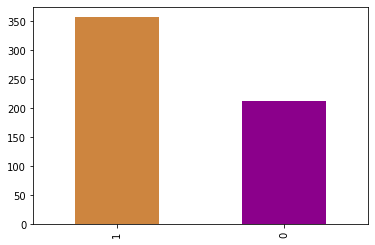

In [34]:
# plot value counts
df["target"].value_counts().plot(kind="bar", color=["peru", "darkmagenta"]);

### Correlation matrix
We san also make a correlation matrix using seaborn, that we imported as `sns`. In correlation matrix, we can see the relationship between all the possible pairs of values in a table. The scale on the left side of the heatmap reveals how interconnected the variables are, 1.0 being the highest, and 0 being the lowest degree of correlation. 
**More about `seaborn` heatmaps**: https://seaborn.pydata.org/generated/seaborn.heatmap.html 

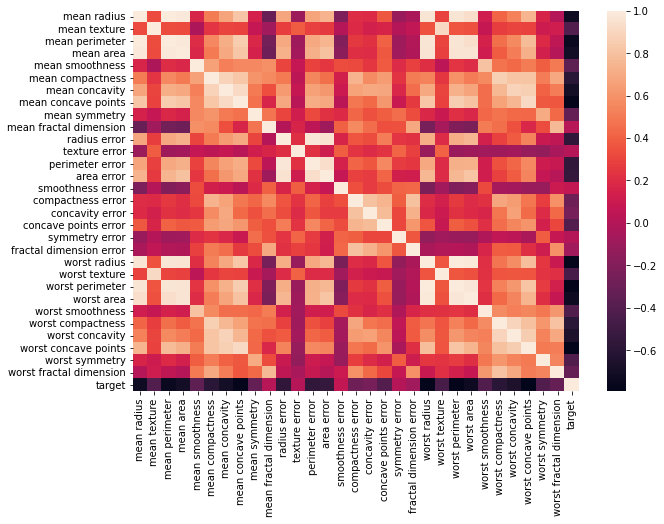

In [14]:
# Make the correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

### Observations:
* From the bar chart, we see that there are more samples of benign than malignant tumors in the dataset.
* Judging from the heatmap, mean fractal dimension, texture error, smoothness error, symmetry error and fractal dimension error seem to influence the target variable the most.

## Split data into train and test sets
To prepare our data for machine learning, there are two steps we need to take:

* Split data into X (labels) and y (target)
> X refers to all the variables that the machine model uses to make a prediction. The labels are the same as the column names. Y, on the other hand, refers to a target variable, or the correct answer. In our case, the correct answer (what the macine is supposed to predict) is whether the scan shows a benign (1) or malignant (0) tumor.

* Split data into test and train sets
> Essentially, we train the model on train set (about 80% of the data), and then we see how well it can predict the target variable on the remaining 20% of data. To split the data, we are using a `scikit-learn` module `train_test_split`.

In [13]:
# store data in X and y variables
X = data.data
y = data.target

# Split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

## Choosing a Machine Learning Model

Different machine learning models are suitable for different problems. In supervised learning, there are two types of machine learning problems: classification and regression. We are dealing with a classification problem, because we need to predict whether the scan is benign (1) or malignant (0). 
> We can use this map to help us choose the right machine learning model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

For our data, we will try 4 different machine learning models: Logistic Regression, KNN, LinearSVC, and Random Forest Classifier.

### Logistic Regression
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/1200px-Sigmoid-function-2.svg.png" width="500" align="right">
Logistic Regression is a statistical method, the algorithm of which can be successfully used for binary classification problems (yes-or-no type of questions). Logistic Regression uses a Sigmoid function. Even though it is a regression model, we can use it as a classification technique if we set a decision threshold. A value below that threshold indicates one class (for example, "no"), and a value above the threshold indicates another class ("yes"). For example, in the picture below, the threshold is set at 0.5.

* Advantages:
 * Easy to implement, interpret, and train. It is very fast at classifying.
 * Performs well when the dataset is linearly separable.
* Disadvantages:
 * The main limitation is the assumption of linearity between the dependent variable and the independent variables.
 * More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

> Read more: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

###KNN
<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_nca_classification_001.png width="500" align="right">
 K-Nearest Neighbors (KNN) is an algorithm that assumes that similar things exist in close proximity. "Birds of a feather flock together." KNN algorithm calculates the distance between different data points, and groups them based on how close or how far they are. 
"K" in KNN is a parameter that refers to the number of nearest neighbors to include in the the voting process. For example, we introduce a new data point. "Is this scan benign or malignant?" If `k=5`, the answer will depend on the answers of 5 neighbors. If 4 out of 5 naighbors are malignant, the new data point will also be classified as malignant. We can find the best K number through experimentaiton, by running the algorithm several times and choose the K that has the least amount of error.

* Advantages:
 * Simple and easy to implement.
 * Can be used for classification, regression, and search problems.
* Disadvantages:
  * Gets slower as the number of examples and/or features increases.

> Read more: https://scikit-learn.org/stable/modules/neighbors.html#classification 
  

###Linear SVC
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png" width="500" align="right">  Vector Machines (SVM) is an algorithm that is used for classification, regression, and outliers detection models. An SVM model tries to find the the optimal hyperlane (threshold) between different classes. The point closest to the hyperplane are called *support vector points*. The distance between the support vector points and the hyperplane is called *margin*. The farter are the support vector points from the hyperplane, the higher is the probability that they will be correctly classified.

If we cannot separate the classes in a given space, we can use the *kernel trick* to try and separate our data point in a higher dimensional space (for example, 3D, or infinite dimension space). There are 3 types of kernels:
1. Linear kernel
2. Polynomial kernel
3. Radial basis function kernel (RBF)/Gaussian kernel 

**LinearSVC** (Support Vector Classification) is a class of SVM, used for classification problems, and uses linear kernel (also sometimes refferd to as "non-kernel"). In other words, the classes can be separated using a single line. It is best to always try linear kernel first (because it is faster to train and test), and only if the result is not good, try a nonlinear kernel.

* Advantages:
 * Effective when the number of features are more than training examples.
 * Best algorithm when the classes are separable.
 * Suited for extreme case binary classification.
* Disadvantages:
  * Not suitable for large datasets, because takes a long time to process.
  * Does not perform well with overlapping classes.
  * Selecting the appropriate kernel function can be tricky.

> Read more: https://scikit-learn.org/stable/modules/svm.html#svm-kernels 

### Random Forest 
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d8/Decision_Tree_vs._Random_Forest.png" width="500" align="right">
Random Forest is an algorithm within ensemble methods. Ensemble methods combine predictions of several estimators to reach the final prediction. Random Forest is comosed of a number of decision trees (estimators). Random Forest method includes two classes: `RandomForestClassifier` 
 and `RandomForestRegressor`. For our current project, we are going to use `RandomForestClassifier`. In a classification problem, each tree votes whether it thinks the cancer scan is malignant (0) or benign (1), and the most popular answer is chosen as the final result.

* Advantages:
  * Low risk of overfitting
  * Robust to outliers
  * Runs efficiently on large datasets 
  * Has a higher accuracy score than other algorithms

* Disadvantages:
  * Can be biased when dealing with categorical data
  * Slow training
  * Not suitable for linear models with many missing values

> Read more: https://scikit-learn.org/stable/modules/ensemble.html#forest 

In [21]:
# Create a dictionary of machine learning algorithms

models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Linear SVC": LinearSVC(),
          "Random Forest": RandomForestClassifier()}

 # Create a funtion to train (fit) and score models
def train_score(models, X_train, X_test, y_train, y_test):
  # Set random seed
  np.random.seed(0)
  # Make an empty dictionary for model scores
  scores = {}  
  # Loop through models
  for name, model in models.items():
      #Fit the model to the data
      model.fit(X_train, y_train)
      #Evaluate the model and append its score to the scores dictionary
      scores[name] = model.score(X_test, y_test)
  return scores

In [22]:
# let‘s try the function
scores = train_score(models = models,
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)

scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'KNN': 0.8947368421052632,
 'Linear SVC': 0.9035087719298246,
 'Logistic regression': 0.9122807017543859,
 'Random Forest': 0.9649122807017544}

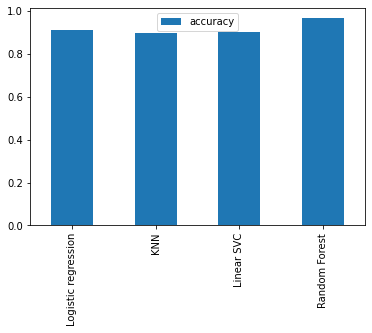

In [27]:
### Model comparison
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();